In [50]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


Evaluation Project 7

Loan Application Status Prediction

OBJECTIVE : Dataset includes details of applicants who have applied for loan. It includes details like credit history, loan amount, their income, dependents etc.To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

IDENTIFYING TYPE : Target variable is categorical contains variable 'Y' or 'N', This is a classic case of Binary Classification and hence Logistic Regression algorithm best suits.However we will apply classification algorithms such as DecisionTree Classifier, RandomForest Classifier and SVM to verify best predicted model as per initial hypothesis.

In [51]:
#Loading the data and converting to DataFrame.
df= pd.read_csv("Loan_Application.csv")
df=pd.DataFrame(data=df)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
# Size of data
df.shape
#There are 614 rows and 13 columns

(614, 13)

In [53]:
#Checking Columns in data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
#checking the datatype of each column 
print(df.dtypes)
#CoapplicantIncome,loan amount,loan amount term , credit history are float data type
# Application income is in integer data type and rest are object data type

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [55]:
#Information of the database
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

DATA DESCRIPTION : Now we have a dataset of 614 samples and 13 features/columns. Most of the features are categorical and some are numerical. Target variable (Loan_Status) is categorical. Certain features like Loan_id, Loan_Amount_Term seems irrelevant in my initial analysis.

In [56]:
#checking the shape of data set
df.shape

(614, 13)

In [57]:
# Statistical info
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As per statistical information, there are missing values in some columns such as Coapplicant income and Credit_History. Salary ranges from 150.00 to 81,000.00

# EDA Exploratory Data Analysis

In [58]:
# Check full null/missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 13 null values in Gender, 3 null values in married, 15 null values in Dependents, 32 null values in Self_employed, 22 null values in Loan MAOUNT, 14 NULL VALUES IN lOAN amount term and 50 null values in Credit History. Lets fill the numeric Nan values with respective mean value. Also the Categorical value with mode value. Initially I tried another approach by dropping the Nan values using dropna(), However then I noticed more than 100 rows were deleted while dropping Nan values and hence changed the approach.

<AxesSubplot:>

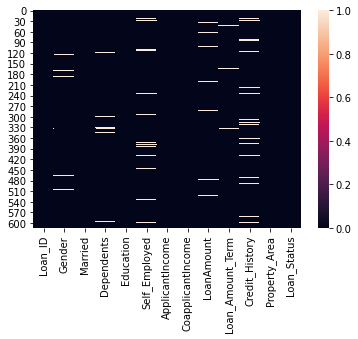

In [59]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is null values present in Gender,Dependents,Self employed,Loan amount 
#loan amount term and credit histry

In [60]:
# filling the missing values for numerical terms - mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [61]:
# Mode values
df['Self_Employed'].mode()

0    No
dtype: object

In [62]:
# Filling the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [63]:
# All null values are replaced.
df['Gender'].isnull().sum()

0

In [64]:
# Converting target variable(categorical) to numeric, for that we use Label encoding technique.
# Label Encoding using pandas DataFrame replace function

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace = True)

In [65]:
# Checking encoded Variable
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Values of Dependent variable/Target variable

In [66]:
#Checking gender how many males and how many females
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [67]:
#Checking dependents
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [68]:
# Replacing 3+ to 4 as i worked with 3+ and in the end during modelling it threw an error saying its a string.
# So converting it to a numeral.
df= df.replace(to_replace='3+',value=4)

In [69]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no missing values now

DATA VISUALIZATION

Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

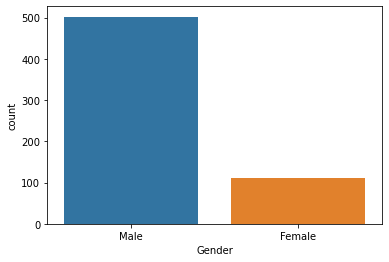

In [70]:
#Checking class imbalance problem using sns pot
sns.countplot(df['Gender'])

From the above observations the total number of males are 500 and females are 100.males are morethan females.

<AxesSubplot:xlabel='Married', ylabel='count'>

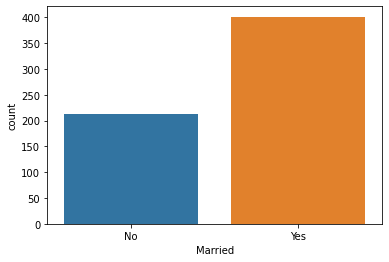

In [71]:
sns.countplot(df['Married'])

Female married are morethan that males

<AxesSubplot:xlabel='Dependents', ylabel='count'>

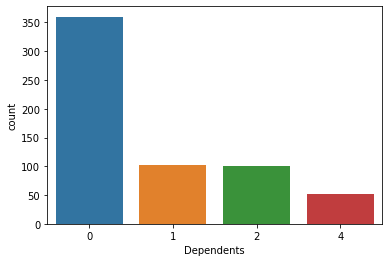

In [72]:
#Visualizing dependents
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

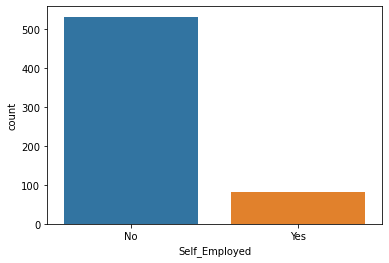

In [73]:
sns.countplot(df['Self_Employed'])

Male self employed are more than that female self employed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

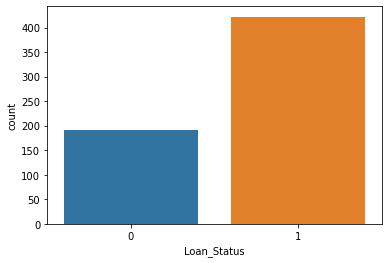

In [74]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

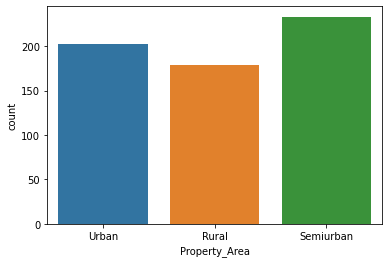

In [75]:
sns.countplot(df['Property_Area']) 

<AxesSubplot:xlabel='Education', ylabel='count'>

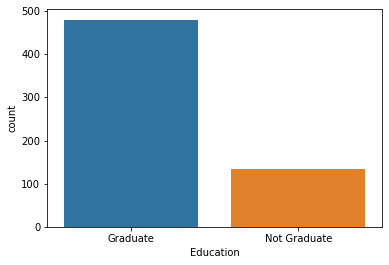

In [76]:
sns.countplot(df['Education'])

<AxesSubplot:ylabel='Loan_Status'>

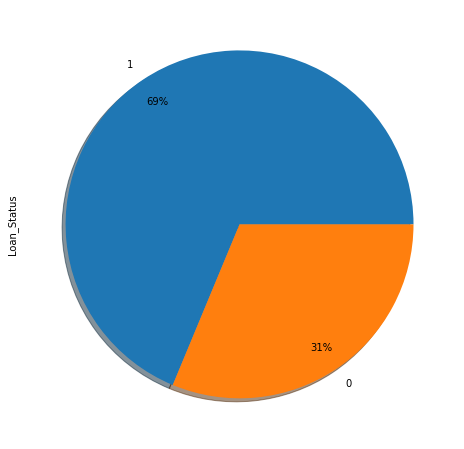

In [77]:
# Target Variable
# Loan Status

plt.figure(figsize=(10,8))
df['Loan_Status'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)

'Y' is reresented by 1 and 'N' by 0.
Loan Status is approved for 69% and rejected for 31%.
So approval rate is pretty good.
Lets evaluate further features.

{'bodies': [<matplotlib.collections.PolyCollection at 0x29989373fd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x29989373df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x299893824f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x299893827f0>}

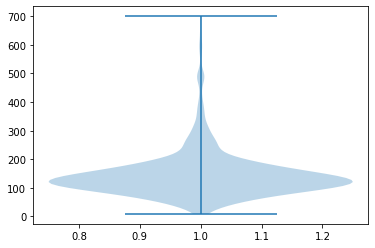

In [78]:
plt.violinplot(df["LoanAmount"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x299893df790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x299893df5e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x299893df640>,
 'cbars': <matplotlib.collections.LineCollection at 0x299893dfc40>}

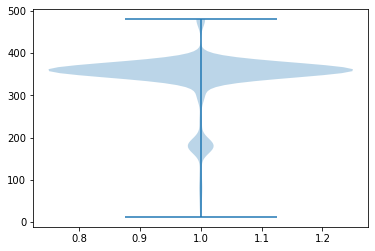

In [79]:
plt.violinplot(df["Loan_Amount_Term"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2998943e460>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x299893b6310>,
 'cmins': <matplotlib.collections.LineCollection at 0x2998943e910>,
 'cbars': <matplotlib.collections.LineCollection at 0x2998943ec10>}

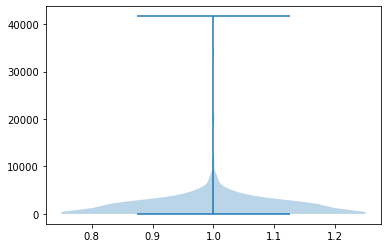

In [80]:
plt.violinplot(df["CoapplicantIncome"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x29989492c10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x29989492a30>,
 'cmins': <matplotlib.collections.LineCollection at 0x299894a1100>,
 'cbars': <matplotlib.collections.LineCollection at 0x299894a1400>}

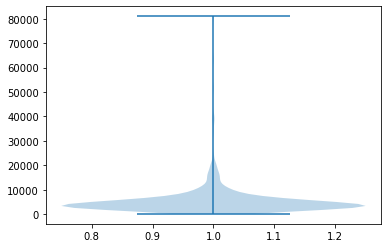

In [81]:
plt.violinplot(df["ApplicantIncome"])

Bivariate Analysis

<AxesSubplot:xlabel='Education', ylabel='count'>

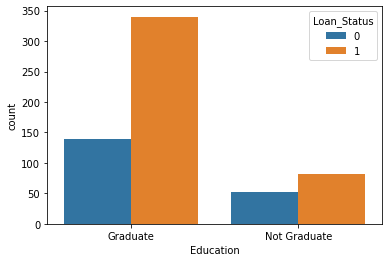

In [82]:
# Now lets evaluate relation of other variables to target variable.
# Education vs Loan_Status.
sns.countplot(x=df['Education'], hue= df['Loan_Status'], data=df)

Approval rate is remarkably higher for Graduates.
So we can say that graduate is a prime factor for approval.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

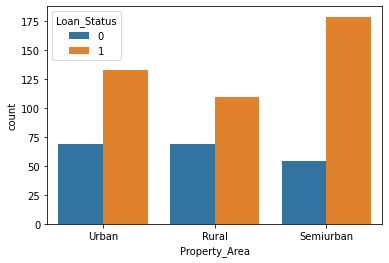

In [83]:
# Maritual Status vs Loan_Status
sns.countplot(x=df['Property_Area'], hue= df['Loan_Status'], data=df)

Approvals are higher and rejections are least for Semiurban area. However i assume we cannot consider this as an important information to determine target variable.

<AxesSubplot:xlabel='Married', ylabel='count'>

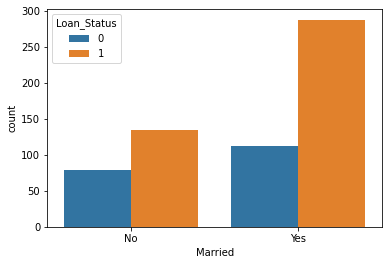

In [84]:
# Maritual Status vs Loan_Status
sns.countplot(x=df['Married'], hue= df['Loan_Status'], data=df)

We can see a approval is higher close to 300 for married applicants.
Income of the spouse added, could be a reason for this higher approval.
Inorder to evaluate further columns lets convert categorical vales to numerals.

<AxesSubplot:xlabel='Gender', ylabel='count'>

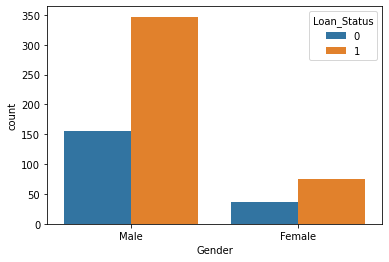

In [85]:
#Gender vs Loan Status
sns.countplot(x="Gender",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

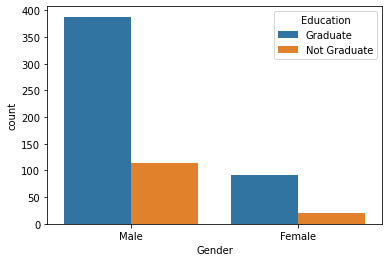

In [86]:
#Gender vs Education
sns.countplot(x="Gender",hue="Education",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

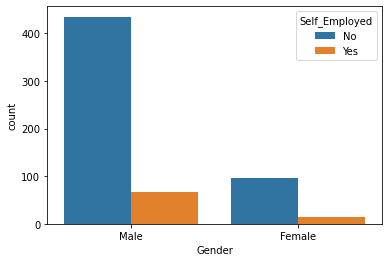

In [87]:
#Countplot for Gender Vs Slf Employed
sns.countplot(x="Gender",hue="Self_Employed",data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

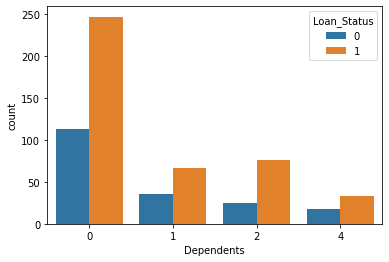

In [88]:
#Countplot for Dependents vs Loan Status
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

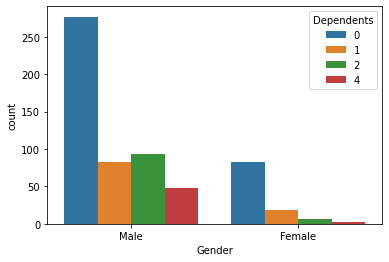

In [89]:
#Countplot for Gender vs Dependents
sns.countplot(x="Gender",hue="Dependents",data=df)

Multivariate Analysis

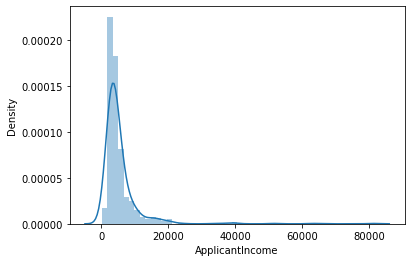

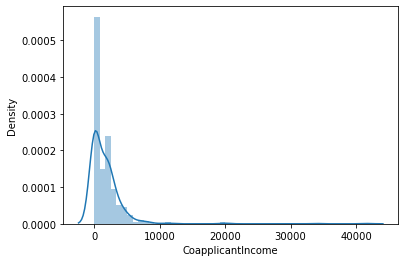

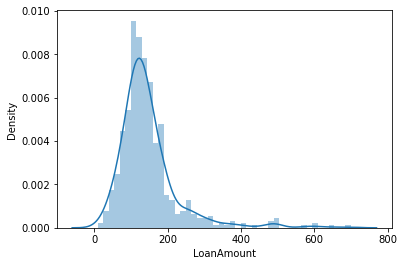

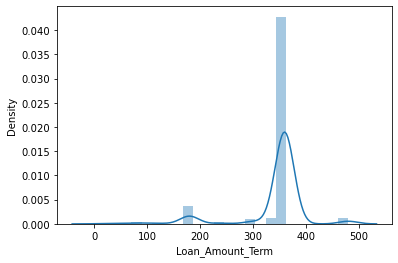

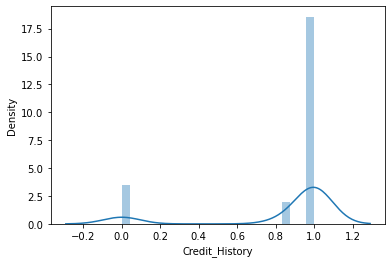

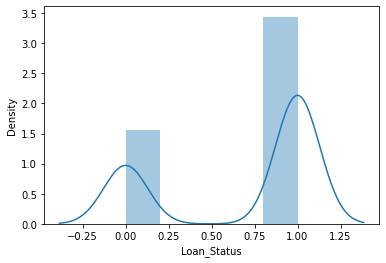

In [90]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()
    


# From the above visualization we can say that
-> Majority of the applicant income lies between 0 to 20000 and only few applicant have more than 20000 income

-> Majority of the coapplicant income lies between 0 to 7000 and only few coapplicant have more than 7000 income

->Majority of loan amount lies between 0 to 200

ApplicantIncome         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
CoapplicantIncome    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
LoanAmount           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Loan_Amount_Term     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Credit_History       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Loan_Status          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

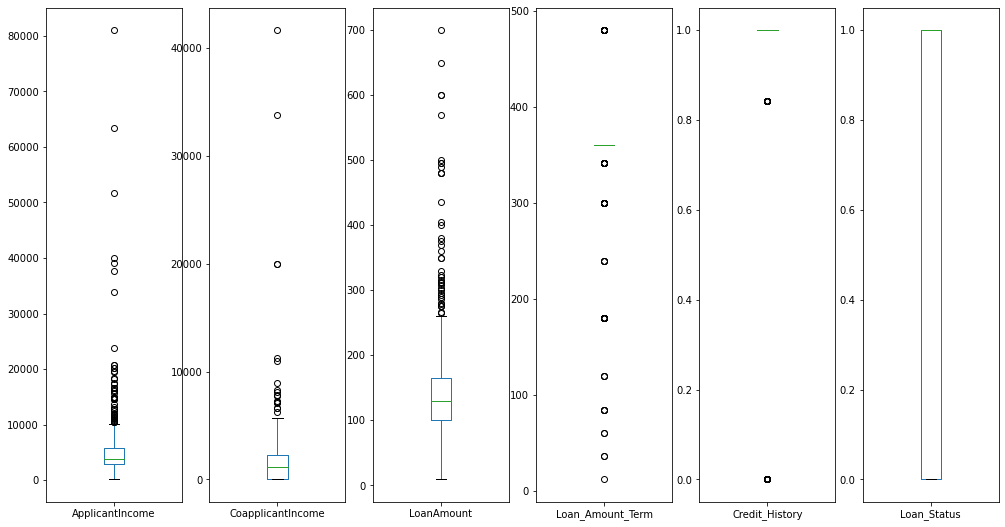

In [91]:
# from below observation we can say that many outliers are present in ApplicantIncome, CoaaplicantIncome, LoanAmount

df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,20))

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>]], dtype=object)

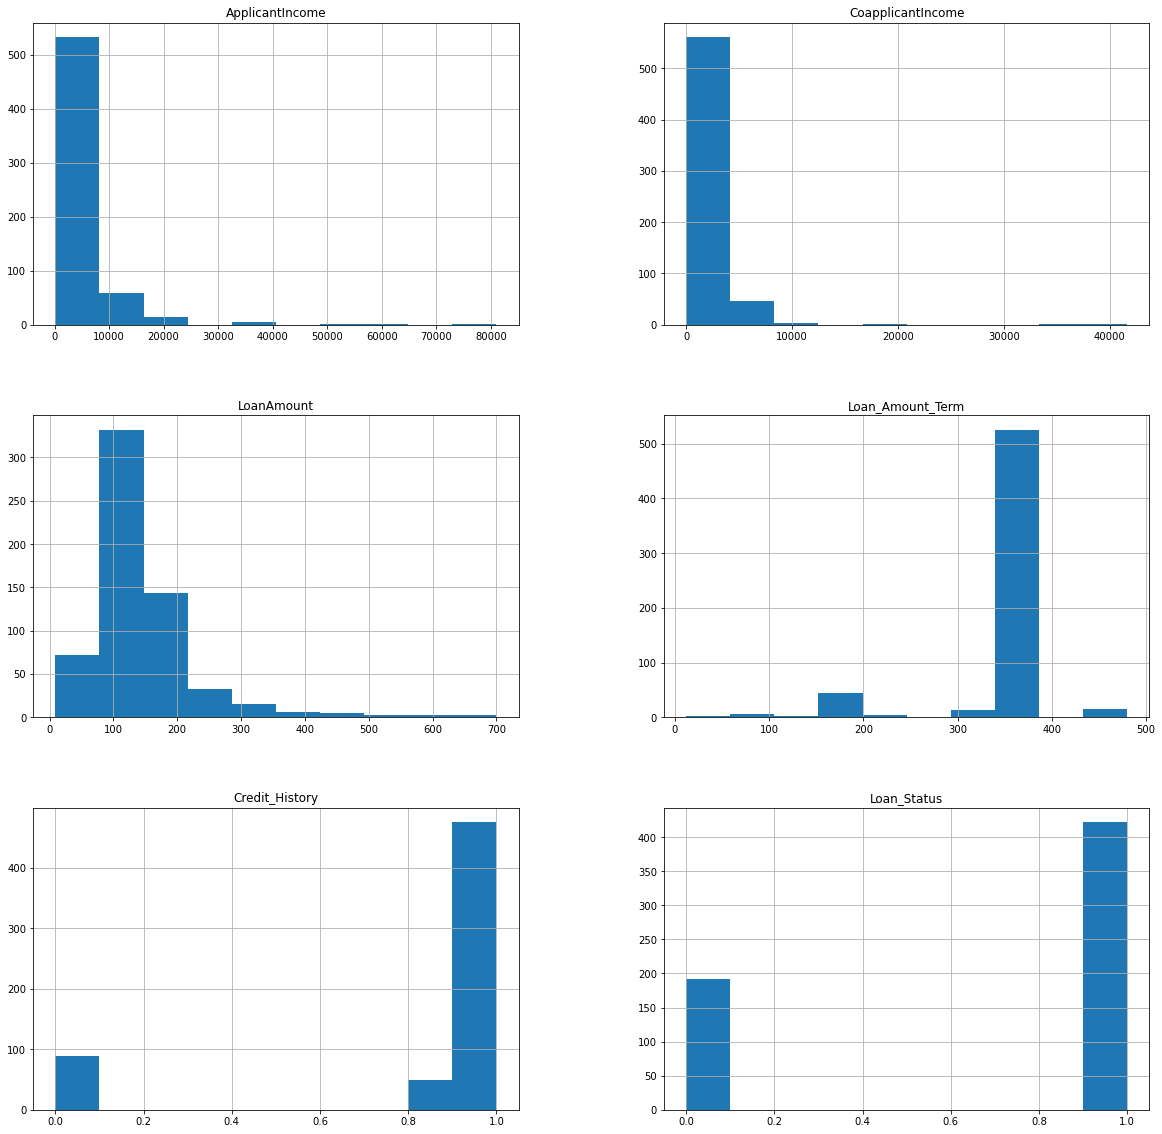

In [92]:
df.hist(figsize=(20,20))

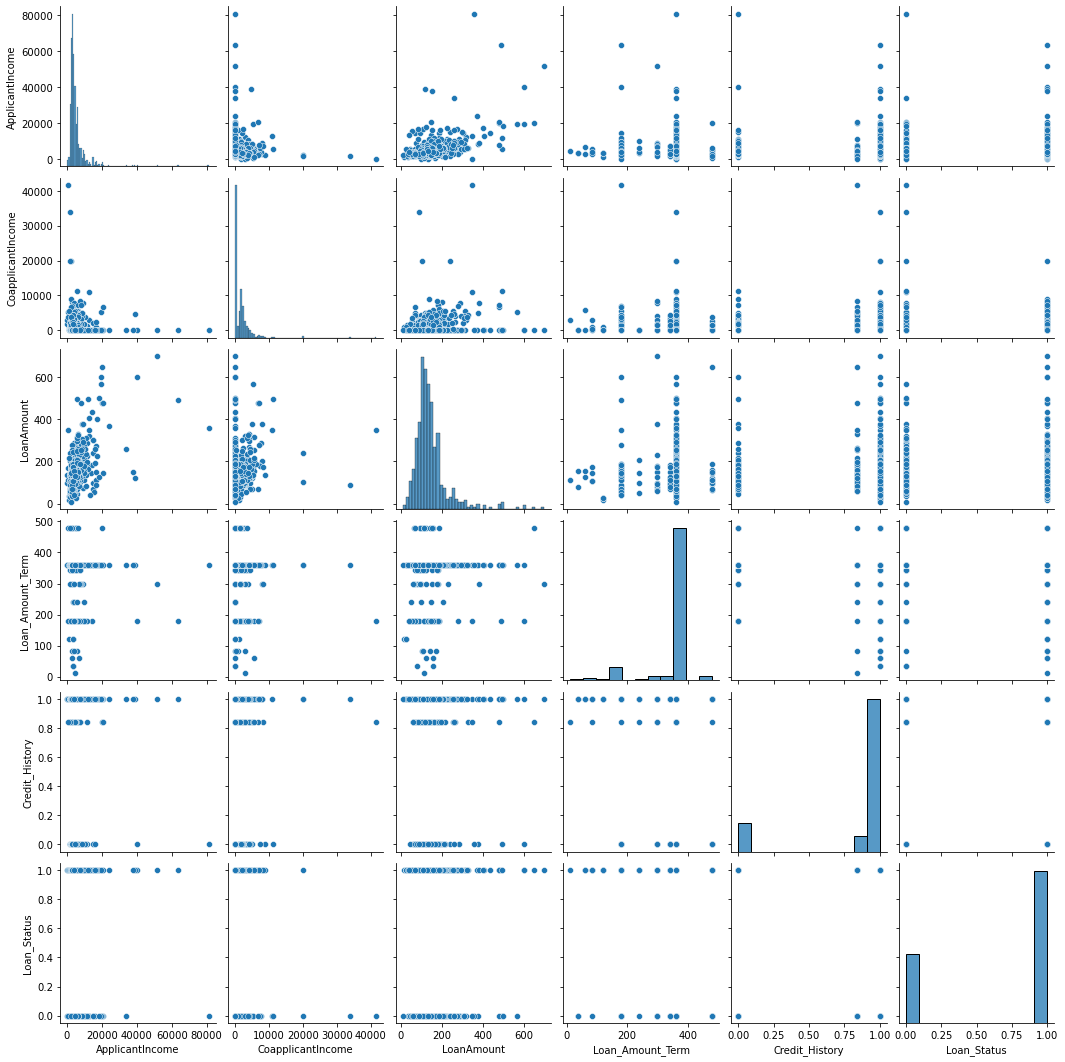

In [93]:
sns.pairplot(df)

<AxesSubplot:>

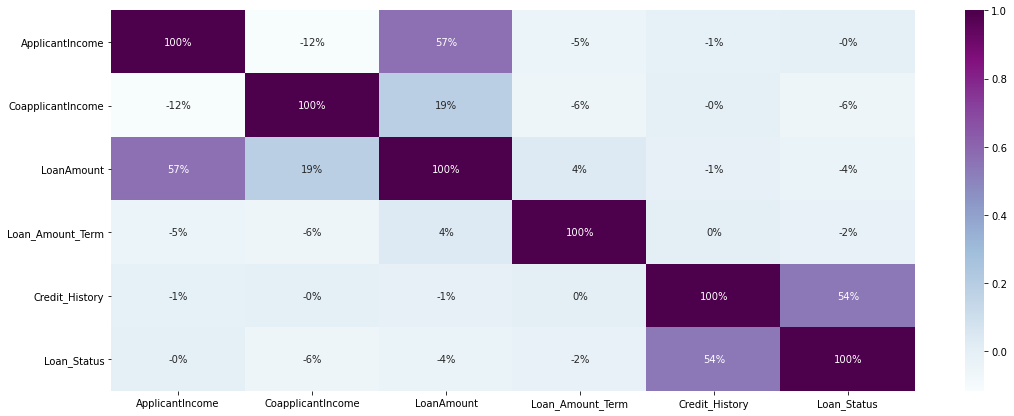

In [94]:
# Lets check for correlation.
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot=True,cmap='BuPu',fmt='.0%')

we can see some positive correlation here with the target variable. Gender, Married, Education,Property_Area has lowest correlation (<10%) with Loan_Status. Some serious insights, Variables like Self_Employed, Applicantincome shows 0% correlation. Credit history is the prime factor having highest correlation (54%).

# Creating a New Attribute

In [95]:
df['Total income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


# Transforming Data set into numerical category by using LabelEncoder

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))


# Dropping unnecessary columns

In [97]:
df.drop(columns=["ApplicantIncome"],inplace=True)
df.drop(columns=["CoapplicantIncome"],inplace=True)


In [98]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


# Statistical Analysis

In [99]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.842199,1.037459,0.687296,7024.705081
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.349681,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

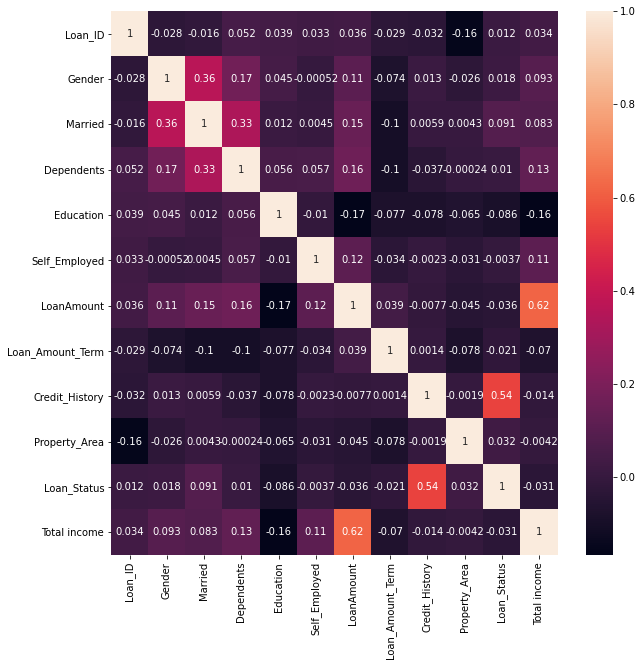

In [100]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show

-> From the above observation we can see that loan status is positively related with credit history, property area, married and dependents


-> And negatively related with Education, self employed, loan amount, loan amount term and total income

In [101]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.035684,-0.028945,-0.032429,-0.155416,0.011773,0.033774
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.012819,-0.025752,0.017987,0.093191
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.005852,0.004257,0.091478,0.083319
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.037392,-0.000244,0.010118,0.125590
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884,-0.161362
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.002260,-0.030860,-0.003700,0.113000
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.007738,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.001395,-0.077620,-0.020974,-0.069830
Credit_History,-0.032429,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.007738,0.001395,1.000000,-0.001880,0.540483,-0.014447
Property_Area,-0.155416,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,-0.001880,1.000000,0.032112,-0.004218


# Removing Outliers

In [102]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("new shape after removing outliers",df.shape)
print("skewness after removing outliers")
print(df.skew())

The shape before removing outliers and skewness (614, 12)
skewness before removing outliers
Loan_ID             0.000000
Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.726601
Loan_Amount_Term   -2.389680
Credit_History     -1.963600
Property_Area      -0.066196
Loan_Status        -0.809998
Total income        5.633449
dtype: float64
new shape after removing outliers (581, 12)
skewness after removing outliers
Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187261
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Loan_Status        -0.816015
Total income        2.049400
dtype: float64


# Splitting the data into input and target

In [103]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [104]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0


In [105]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [106]:
print(x.shape)
print(y.shape)

(581, 11)
(581,)


In [107]:
y=y.values.reshape(-1,1)

In [108]:
y.shape

(581, 1)

In [109]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [110]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [111]:
x.skew()

Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          0.703256
Education           1.317262
Self_Employed       2.241256
LoanAmount         -0.648520
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Total income        0.427177
dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [113]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [114]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 53 is 0.8888888888888888


53

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(464, 11)
(464, 1)
(117, 11)
(117, 1)


# Using GridSearchCV to select best Parameter

In [116]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[0.001,0.01,0.1,1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200],"base_estimator":[lg,knc,svc,dtc,rfc]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)




{'penalty': 'l2'}


{'n_neighbors': 7}


{'C': 0.1, 'kernel': 'linear'}


{'criterion': 'gini'}


{'learning_rate': 0.01, 'n_estimators': 120}


{'max_features': 'sqrt', 'n_estimators': 10}


{'base_estimator': RandomForestClassifier(), 'learning_rate': 0.1, 'n_estimators': 10}




The model score for LogisticRegression() are:
[1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1]
Accuracy score = 0.8888888888888888
The cv score is 0.8158561744768642

[[22  3]
 [10 82]]

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        25
           1       0.96      0.89      0.93        92

    accuracy                           0.89       117
   macro avg       0.83      0.89      0.85       117
weighted avg       0.91      0.89      0.89       117



roc_auc_score 0.8261029411764707


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=7) are:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1
 

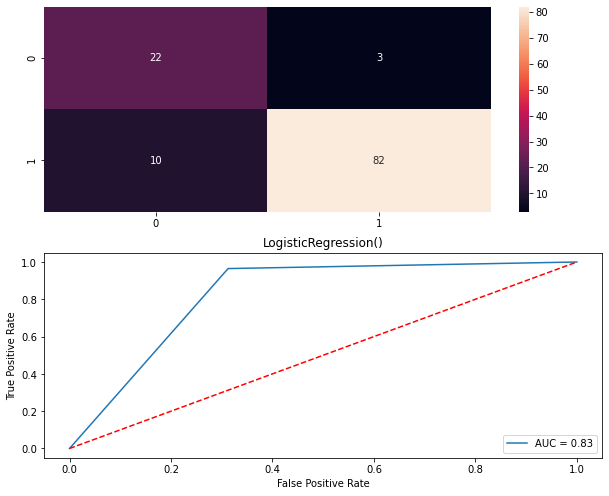

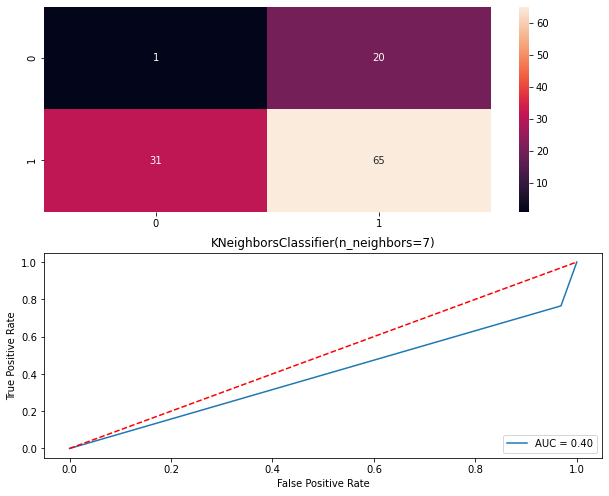

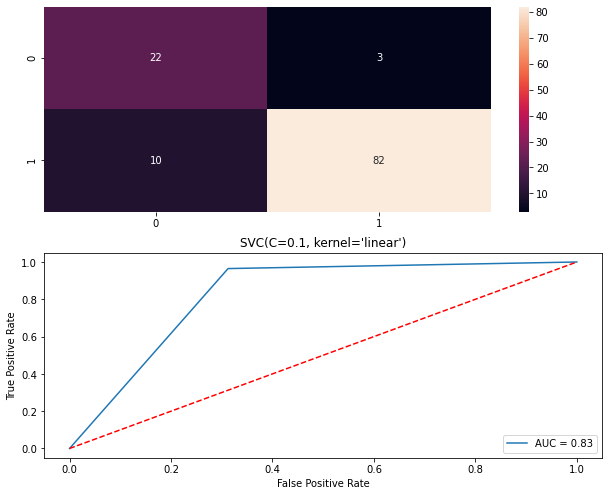

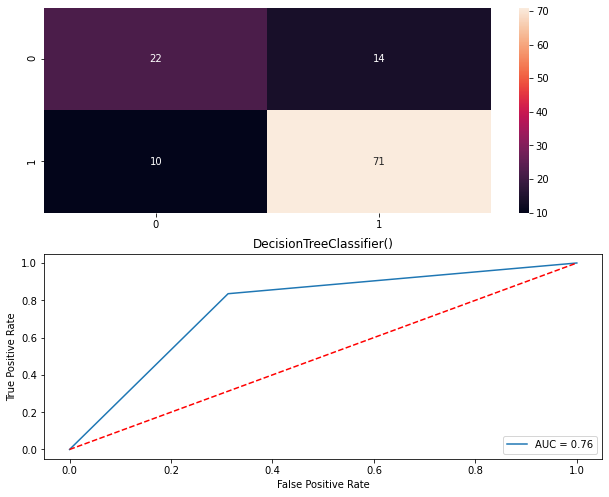

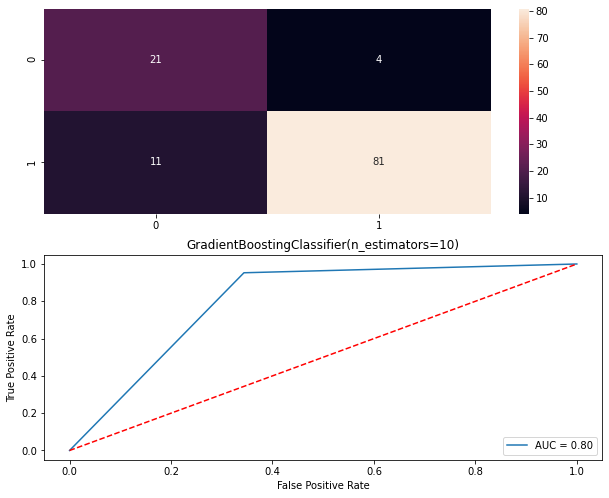

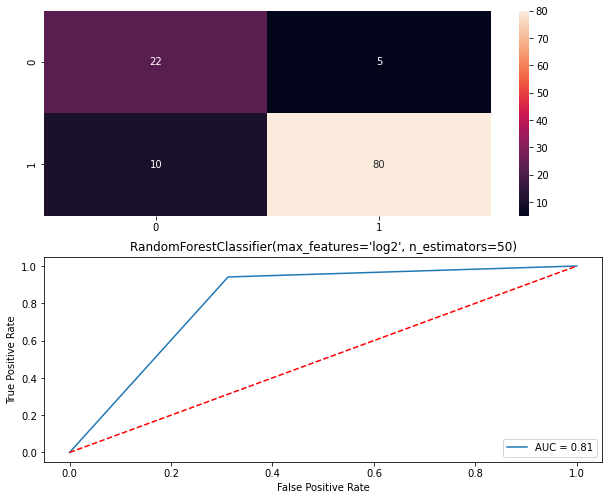

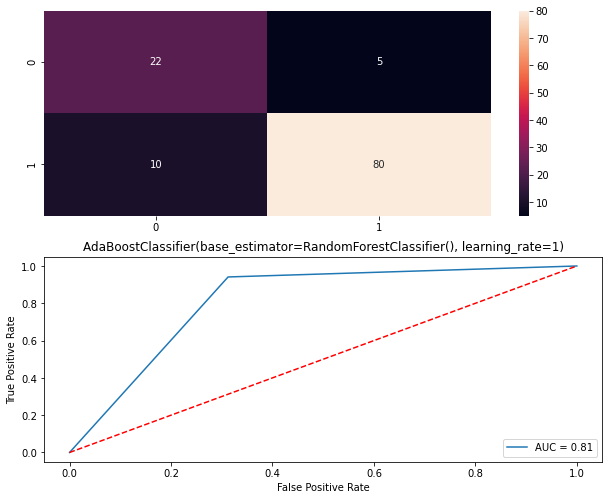

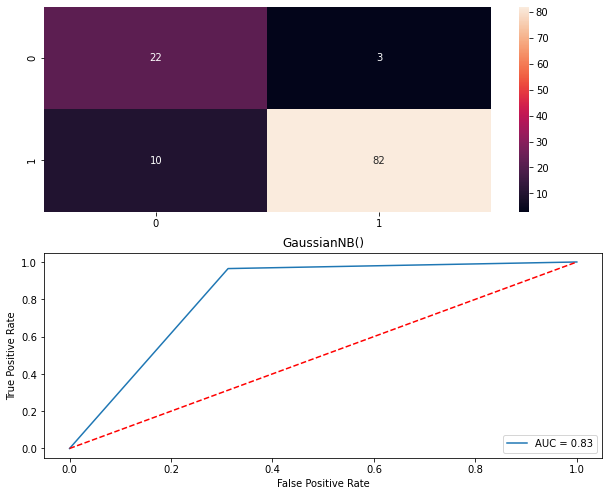

In [117]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=7),SVC(C=0.1,kernel='linear'),
          DecisionTreeClassifier(criterion='gini'),GradientBoostingClassifier(learning_rate=0.01,n_estimators=120),
          RandomForestClassifier(max_features='sqrt',n_estimators=10),
          AdaBoostClassifier(base_estimator= RandomForestClassifier() ,learning_rate =0.1, n_estimators = 10,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

# From below DataFrame we can see that SVC is the best Performing Model¶


In [118]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.888889,0.815856,0.826103
1,KNeighborsClassifier,0.564103,0.645388,0.397978
2,SVC,0.888889,0.815856,0.826103
3,DecisionTreeClassifier,0.794872,0.704126,0.761397
4,GradientBoostingClassifier,0.871795,0.805541,0.804596
5,RandomForestClassifier,0.871795,0.786708,0.814338
6,GaussianNB,0.871795,0.774668,0.814338
7,AdaBoostClassifier,0.888889,0.814117,0.826103


In [119]:
svc=SVC(C=0.1,kernel='linear')
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8888888888888888
The CV Score = 0.8141173003241968
roc_auc_score 0.8261029411764707


# Saving the Model

In [120]:
import joblib
joblib.dump(svc,"Loan_Application.csv.pkl")

['Loan_Application.csv.pkl']

# Saving Prediction in csv file

In [121]:
dft=pd.DataFrame(predict)
dft.to_csv("Loan_Application.csv")